<h1>HighBoost Filtering<h1>

Alunos:<br>
    Vitor Fernandes Gonçalves da Cruz Ra120116 <br> 
    Vitor Rodrigues Gôngora RA106769

<h2>Introdução<h2>

O presente trabalho tem como objetivo receber uma imagem de entrada e aplicar o método  HighBoost Filter através da linguagem de programação python, utilizando o método unsharping mask. Esse método consite em subtrair a imagem suavizada da imagem original. Os passos podem ser descritos da seguinte forma:<br>
1. Blur da imagem original através do filtro da média.
2. Subtração da imagem suavizada com imagem original resultando em uma máscara(g_mask).
3. Multiplicação de um escalar k com g_mask.
4. Soma da imagem original com o passo 3.

Para aplicar a suavização na imagem, é necessário o conceito de convolução, que é o processo de mover uma máscara, ou kernel, pela imagem e calcular a soma do produto ponto a ponto entre a imagem e a máscara rebatida. Uma máscara rebatida é basicamente uma inversão da máscara original, representada por g̅(x, y) = g(-x, -y). Para se ter o high boost filtering precisa-se que k>1

In [55]:
import numpy as np
import  cv2
import matplotlib.pyplot as plt


In [56]:
#Rebate a máscara
def inverse_mask(mask):
    mask = np.flipud(np.fliplr(mask))
    return mask

In [57]:
def average_filter(mask):
    total = np.sum(mask)
    result_mask = mask/total
    return result_mask

In [58]:
def create_mask(n):
    return np.ones((n,n))

In [59]:

def highBoost(image, mask,k,input_user):
    mask_average_filter = average_filter(mask)
    mask = inverse_mask(mask_average_filter) # rebate a mascara

    #Faz a convolução 
    image_blur = cv2.filter2D(image,-1,mask_average_filter,borderType=cv2.BORDER_CONSTANT)

    # Subtração
    g_mask = image.astype(float) - image_blur.astype(float)

    # Multiplicação por um escalar 'k'
    mult = (k * g_mask)

    # Adição
    image_result = image + mult

    # Intervalo adequado
    image_result = np.clip(image_result, 0, 255).astype('uint8')

    cv2.imwrite("Blur_Image_"+input_user,image_blur)
    cv2.imwrite("HighBoost_filter_"+input_user,image_result)

    # Criação da figura e dos subplots
    fig = plt.figure(figsize=(12, 4))

    # Primeiro subplot
    fig.add_subplot(1, 2, 1)
    plt.title('Blur Image')
    plt.axis('off')
    plt.imshow(image_blur, cmap='gray', vmin=0, vmax=255)

    # Segundo subplot
    fig.add_subplot(1, 2, 2)
    plt.title('HighBoost Filter k='+str(k))
    plt.axis('off')
    plt.imshow(image_result, cmap='gray', vmin=0, vmax=255)

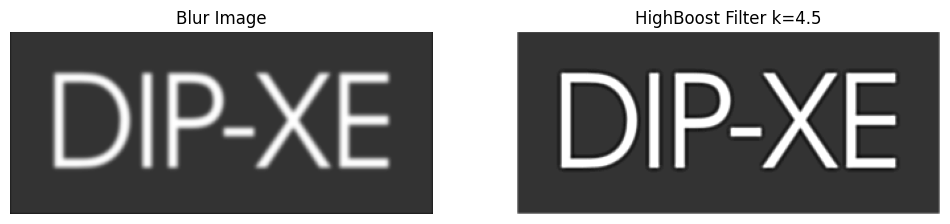

In [60]:
user= (input('Entre com o tamanho da máscara, k e nome da imagem( Ex: 3 4.5 imagem.jpg):')).split(" ")

n = int(user[0])
k = float(user[1])
image_name = user[2]

mask = create_mask(n)

image  = cv2.imread(image_name,cv2.IMREAD_GRAYSCALE)
highBoost(image,mask,k,image_name)

<h2>Referências<h2>

GONZALEZ, Rafael C.; WOODS, Richard E.. Processamento de Imagens Digitais. 3. ed. São Paulo: Pearson,2007